In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install datasets evaluate transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=c6121d0638a423b4bbaf6ea5b3a6b33b93aadbb60b58a8724529565f36ddc5ef
  Stored in directory: /root/.cache/pip/wheels/9b/3d/39/09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge_score


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.0 MB/s eta 0:00:00


## Доступ к данным

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import nltk

In [ ]:
filenames = "/content/gdrive/MyDrive/colab/project_1407/gpt/test.feather"
filenames_df = pd.read_feather(filenames)
filenames_df

,filename
0,/home/aikatsnelson/prj1407/dataset/out/Mathema...
1,/home/aikatsnelson/prj1407/dataset/out/Mathema...
2,/home/aikatsnelson/prj1407/dataset/out/Mathema...
3,/home/aikatsnelson/prj1407/dataset/out/Mathema...
4,/home/aikatsnelson/prj1407/dataset/out/Mathema...
...,...
626,/home/aikatsnelson/prj1407/dataset/out/Nuclear...
627,/home/aikatsnelson/prj1407/dataset/out/Nuclear...
628,/home/aikatsnelson/prj1407/dataset/out/Nuclear...
629,/home/aikatsnelson/prj1407/dataset/out/Economi...


In [ ]:
# # запускать на суперкомпьютере
# dataset_list = []
# for filename in filenames_df["filename"]:
#     test_dataset_list.append(pd.read_feather(filename))
# test_dataset = pd.concat(test_dataset_list)  

In [ ]:
filename = "/content/gdrive/MyDrive/colab/project_1407/gpt/MathematicalPhysics_text.feather"
test_dataset = pd.read_feather(filename)

In [ ]:
test_dataset.shape

(1024, 6)

In [ ]:
test_dataset.head(5)

,index,Index,Title,Annotation,PDF,Latex
0,0,1,Born-Oppenheimer potential energy surfaces for...,\r\nAbstract: We show that the Born-Oppenheime...,https://export.arxiv.org/pdf/2104.09057,We consider a molecule with $N>0$ electrons an...
1,1,2,Generic Features in the Spectral Decomposition...,\r\nAbstract: We show that correlation matrice...,https://export.arxiv.org/pdf/2104.08966,\nTo catch up with ever increasing complexit...
2,2,3,Geometry of the $p$-adic special orthogonal gr...,\r\nAbstract: We derive explicitly the structu...,https://export.arxiv.org/pdf/2104.06228,"interpreted, following Klein's programme , as ..."
3,3,4,"Entropy of quantum states""",\r\nAbstract: Given the algebra of observables...,https://export.arxiv.org/pdf/2104.12611,"\nIn 1931, von Neumann~ found a connection bet..."
4,4,5,A nonstandard proof of the spectral theorem fo...,\r\nAbstract: We generalize Moore's nonstandar...,https://export.arxiv.org/pdf/2104.01949,"\n\nThroughout this note, all Hilbert spaces w..."


In [ ]:
annotation = test_dataset.iloc[0]['Annotation']
text = test_dataset.iloc[0]['Latex']

In [ ]:
annotation2 = test_dataset.iloc[1]['Annotation']
text2 = test_dataset.iloc[1]['Latex']

In [ ]:
model_name_or_path_list = ['gavin124/gpt2-finetuned-cnn-summarization-v2', 'gavin124/gpt2-finetuned-cnn-summarization-v1']

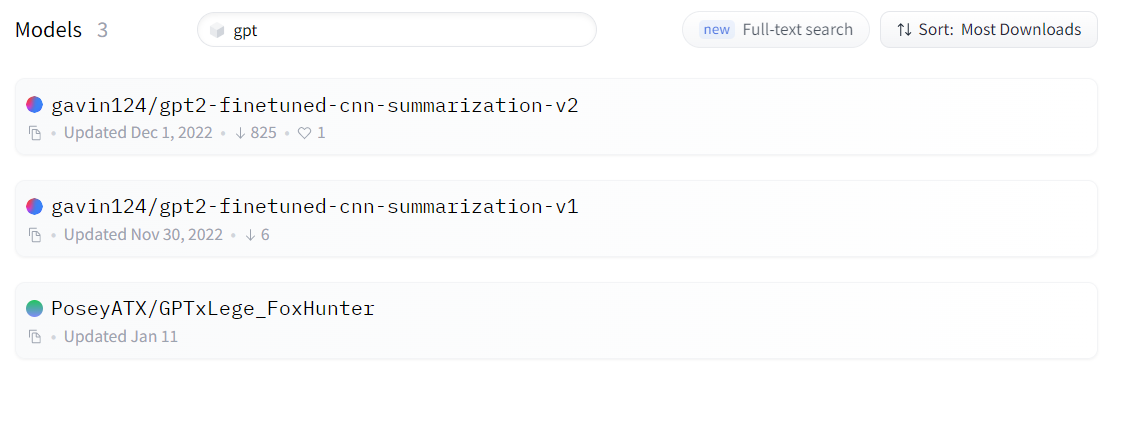

## Модель 1

"gavin124/gpt2-finetuned-cnn-summarization-v2"

In [ ]:
from tqdm import tqdm

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
# DEVICE = torch.device("cuda:0")

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")

def calc_rouge_scores(candidates, references):
    result = rouge.compute(predictions=candidates, references=references, use_stemmer=True)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

<ipython-input-7-ff68fd855f83>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")


In [ ]:
# res = rouge.compute(predictions=[annotation], references=[text], use_stemmer=True)
# res

In [ ]:
#  result = {key: round(value.mid.fmeasure * 100, 1) for key, value in res.items()}
#  result

In [ ]:
model_name_or_path = "gavin124/gpt2-finetuned-cnn-summarization-v2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path)

In [ ]:
err = 0
rouge_sum = {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, 'rougeLsum': 0.0}
BLEUscore_sum  = 0
# for i in tqdm(range(test_dataset.shape[0])):
for i in tqdm(range(500)):
    annotation = test_dataset.iloc[i]['Annotation']
    text = test_dataset.iloc[i]['Latex']

    input_ids = tokenizer.encode(text, return_tensors="pt")
    input_ids = input_ids[:, :1000]
    try:
      out = model.generate(input_ids, max_length = 1600, repetition_penalty=5.0, do_sample=True, top_k=5, top_p=0.95, temperature=1) 
      generated_text = list(map(tokenizer.decode, out))

      predictions = generated_text[0][generated_text[0].find('<|summarize|>')+14:]
      # print(i, predictions)

      res = calc_rouge_scores([predictions], [annotation])
      # print(f"{i} article: Scores {res}")
      rouge_sum = {key: value + rouge_sum[key]  for key, value in res.items()}

      BLEUscore = nltk.translate.bleu_score.sentence_bleu([annotation], [predictions], weights = (0.5, 0.5))
      # print(f"First article: Scores BLEUscore: {BLEUscore}")
      BLEUscore_sum += BLEUscore

    except IndexError:
      print(f"IndexError text {i}: index out of range in self")
      err += 1

# kol = test_dataset.shape[0] - err
kol = 500 - err
rouge_mean = {key: round(rouge_sum[key]/kol, 1)  for key, value in rouge_sum.items()}
BLEUscore_mean = round(BLEUscore_sum / kol, 2)

  0%|          | 0/500 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 1/500 [00:15<2:10:32, 15.70s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  0%|          | 2/500 [00:25<1:42:52, 12.39s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 3/500 [00:34<1:26:54, 10.49s/it]The attention mask and the pad token id were not set. As a co

IndexError text 4: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 6/500 [01:01<1:17:54,  9.46s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|▏         | 7/500 [01:12<1:21:14,  9.89s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 6: index out of range in self


  2%|▏         | 8/500 [01:20<1:15:25,  9.20s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 9/500 [01:29<1:16:14,  9.32s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 10/500 [01:38<1:13:53,  9.05s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 11/500 [01:48<1:16:32,  9.39s/it]The attention mask and the pad token id were not 

IndexError text 10: index out of range in self


  2%|▏         | 12/500 [01:58<1:17:52,  9.57s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  3%|▎         | 13/500 [02:06<1:14:18,  9.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  3%|▎         | 14/500 [02:17<1:17:30,  9.57s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 13: index out of range in self


  3%|▎         | 15/500 [02:24<1:12:01,  8.91s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  3%|▎         | 16/500 [02:34<1:14:28,  9.23s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  3%|▎         | 17/500 [02:43<1:14:37,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 16: index out of range in self


  4%|▎         | 18/500 [02:51<1:11:18,  8.88s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  4%|▍         | 19/500 [03:01<1:14:20,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  4%|▍         | 20/500 [03:10<1:13:31,  9.19s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 19: index out of range in self


  4%|▍         | 21/500 [03:21<1:17:12,  9.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  4%|▍         | 22/500 [03:31<1:16:32,  9.61s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 21: index out of range in self


  5%|▍         | 23/500 [03:40<1:15:00,  9.44s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 22: index out of range in self


  5%|▍         | 24/500 [03:50<1:17:11,  9.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 23: index out of range in self


  5%|▌         | 25/500 [03:59<1:15:47,  9.57s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 24: index out of range in self


  5%|▌         | 26/500 [04:09<1:17:00,  9.75s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 25: index out of range in self


  5%|▌         | 27/500 [04:19<1:17:05,  9.78s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  6%|▌         | 28/500 [04:28<1:14:26,  9.46s/it]

IndexError text 27: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  6%|▌         | 29/500 [04:38<1:15:12,  9.58s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 29: index out of range in self


  6%|▌         | 31/500 [04:46<55:27,  7.10s/it]  The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  6%|▋         | 32/500 [04:56<1:01:12,  7.85s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  7%|▋         | 33/500 [05:07<1:06:33,  8.55s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  7%|▋         | 34/500 [05:16<1:06:32,  8.57s/it]

IndexError text 33: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  7%|▋         | 35/500 [05:26<1:10:46,  9.13s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 34: index out of range in self


  7%|▋         | 36/500 [05:36<1:11:13,  9.21s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  7%|▋         | 37/500 [05:43<1:07:15,  8.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  8%|▊         | 38/500 [05:53<1:10:34,  9.17s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 37: index out of range in self


  8%|▊         | 39/500 [06:02<1:08:47,  8.95s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  8%|▊         | 40/500 [06:12<1:11:18,  9.30s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  8%|▊         | 41/500 [06:20<1:09:17,  9.06s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  8%|▊         | 42/500 [06:30<1:11:30,  9.37s/it]The attention mask and the pad token id were no

IndexError text 41: index out of range in self


  9%|▊         | 43/500 [06:46<1:25:50, 11.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  9%|▉         | 44/500 [06:56<1:21:26, 10.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  9%|▉         | 45/500 [08:05<3:35:03, 28.36s/it]

IndexError text 44: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  9%|▉         | 46/500 [08:16<2:54:50, 23.11s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 45: index out of range in self


  9%|▉         | 47/500 [08:24<2:19:40, 18.50s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 10%|▉         | 48/500 [08:34<2:00:11, 15.96s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 10%|▉         | 49/500 [08:42<1:43:17, 13.74s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 10%|█         | 50/500 [08:52<1:33:50, 12.51s/it]The attention mask and the pad token id were no

IndexError text 51: index out of range in self


 11%|█         | 53/500 [09:22<1:20:36, 10.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 52: index out of range in self


 11%|█         | 54/500 [09:30<1:15:39, 10.18s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 53: index out of range in self


 11%|█         | 55/500 [09:40<1:15:29, 10.18s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 11%|█         | 56/500 [09:51<1:15:51, 10.25s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 55: index out of range in self


 11%|█▏        | 57/500 [09:59<1:11:10,  9.64s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 12%|█▏        | 58/500 [10:09<1:12:26,  9.83s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 57: index out of range in self


 12%|█▏        | 59/500 [10:19<1:11:22,  9.71s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 12%|█▏        | 60/500 [10:28<1:10:48,  9.65s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 12%|█▏        | 61/500 [10:39<1:12:25,  9.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 60: index out of range in self


 12%|█▏        | 62/500 [10:48<1:10:28,  9.65s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 61: index out of range in self


 13%|█▎        | 63/500 [10:58<1:10:49,  9.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 62: index out of range in self


 13%|█▎        | 64/500 [11:08<1:13:00, 10.05s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 63: index out of range in self


 13%|█▎        | 65/500 [11:17<1:10:24,  9.71s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 64: index out of range in self


 13%|█▎        | 66/500 [11:28<1:11:44,  9.92s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 13%|█▎        | 67/500 [11:38<1:11:28,  9.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 66: index out of range in self


 14%|█▎        | 68/500 [11:47<1:10:04,  9.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 67: index out of range in self


 14%|█▍        | 69/500 [11:58<1:12:42, 10.12s/it]

IndexError text 68: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 14%|█▍        | 70/500 [12:08<1:11:06,  9.92s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 14%|█▍        | 71/500 [12:17<1:10:15,  9.83s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 70: index out of range in self


 14%|█▍        | 72/500 [12:32<1:20:15, 11.25s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 15%|█▍        | 73/500 [12:42<1:17:53, 10.94s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 72: index out of range in self


 15%|█▍        | 74/500 [12:50<1:12:00, 10.14s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 15%|█▌        | 75/500 [13:01<1:13:08, 10.33s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 15%|█▌        | 76/500 [13:10<1:10:31,  9.98s/it]

IndexError text 75: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 15%|█▌        | 77/500 [13:20<1:09:37,  9.87s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 16%|█▌        | 78/500 [13:30<1:10:36, 10.04s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 16%|█▌        | 79/500 [13:39<1:08:24,  9.75s/it]

IndexError text 78: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 16%|█▌        | 80/500 [13:50<1:09:39,  9.95s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 16%|█▌        | 81/500 [14:00<1:10:40, 10.12s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 80: index out of range in self


 16%|█▋        | 82/500 [14:09<1:06:51,  9.60s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 17%|█▋        | 83/500 [14:18<1:06:51,  9.62s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 17%|█▋        | 84/500 [14:26<1:02:19,  8.99s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 17%|█▋        | 85/500 [14:36<1:05:17,  9.44s/it]The attention mask and the pad token id were no

IndexError text 86: index out of range in self


 18%|█▊        | 88/500 [15:05<1:06:23,  9.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 87: index out of range in self


 18%|█▊        | 89/500 [15:13<1:03:23,  9.26s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 18%|█▊        | 90/500 [15:24<1:06:17,  9.70s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 18%|█▊        | 91/500 [15:25<47:49,  7.02s/it]  The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 18%|█▊        | 92/500 [15:36<55:03,  8.10s/it]The attention mask and the pad token id were not 

IndexError text 91: index out of range in self


 19%|█▊        | 93/500 [15:44<56:20,  8.31s/it]

IndexError text 92: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 19%|█▉        | 94/500 [15:55<1:00:14,  8.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 93: index out of range in self


 19%|█▉        | 95/500 [16:05<1:02:56,  9.33s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 94: index out of range in self


 19%|█▉        | 96/500 [16:14<1:02:09,  9.23s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 95: index out of range in self


 19%|█▉        | 97/500 [16:27<1:10:22, 10.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 20%|█▉        | 98/500 [16:45<1:23:53, 12.52s/it]

IndexError text 97: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 20%|█▉        | 99/500 [16:59<1:27:37, 13.11s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 20%|██        | 100/500 [17:08<1:18:01, 11.70s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 20%|██        | 101/500 [17:17<1:13:34, 11.06s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpec

IndexError text 100: index out of range in self


 20%|██        | 102/500 [17:27<1:11:17, 10.75s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 21%|██        | 103/500 [17:36<1:07:25, 10.19s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 102: index out of range in self


 21%|██        | 104/500 [17:45<1:05:39,  9.95s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 21%|██        | 105/500 [17:54<1:03:34,  9.66s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 21%|██        | 106/500 [18:04<1:03:50,  9.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 21%|██▏       | 107/500 [18:15<1:05:15,  9.96s/it]

IndexError text 106: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 22%|██▏       | 108/500 [18:24<1:02:51,  9.62s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 107: index out of range in self


 22%|██▏       | 109/500 [18:33<1:03:07,  9.69s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 22%|██▏       | 110/500 [18:42<1:00:52,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 22%|██▏       | 111/500 [18:52<1:01:06,  9.43s/it]

IndexError text 110: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 22%|██▏       | 112/500 [19:02<1:03:13,  9.78s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 111: index out of range in self


 23%|██▎       | 113/500 [19:11<1:01:36,  9.55s/it]

IndexError text 112: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 23%|██▎       | 114/500 [19:22<1:04:05,  9.96s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 23%|██▎       | 115/500 [19:33<1:04:49, 10.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 23%|██▎       | 116/500 [19:41<1:02:01,  9.69s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpe

IndexError text 115: index out of range in self


 23%|██▎       | 117/500 [19:52<1:02:57,  9.86s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 116: index out of range in self


 24%|██▎       | 118/500 [20:00<1:00:47,  9.55s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 117: index out of range in self


 24%|██▍       | 119/500 [20:09<58:57,  9.28s/it]  The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 24%|██▍       | 120/500 [20:19<59:54,  9.46s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 24%|██▍       | 121/500 [20:30<1:03:33, 10.06s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 120: index out of range in self


 24%|██▍       | 122/500 [21:41<2:58:23, 28.32s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 25%|██▍       | 123/500 [21:51<2:23:23, 22.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 25%|██▍       | 124/500 [21:59<1:54:52, 18.33s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 124: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 25%|██▌       | 126/500 [22:13<1:20:56, 12.99s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 25%|██▌       | 127/500 [22:21<1:14:18, 11.95s/it]

IndexError text 126: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 26%|██▌       | 128/500 [22:30<1:09:17, 11.18s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 26%|██▌       | 129/500 [22:41<1:07:34, 10.93s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 26%|██▌       | 130/500 [22:48<1:01:09,  9.92s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpe

IndexError text 134: index out of range in self


 27%|██▋       | 136/500 [23:42<56:40,  9.34s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 27%|██▋       | 137/500 [23:51<54:52,  9.07s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 28%|██▊       | 138/500 [24:01<56:05,  9.30s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 28%|██▊       | 139/500 [24:11<57:49,  9.61s/it]The attention mask and the pad token id were not se

IndexError text 138: index out of range in self


 28%|██▊       | 140/500 [24:19<54:34,  9.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 28%|██▊       | 141/500 [24:29<55:52,  9.34s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 28%|██▊       | 142/500 [24:39<56:52,  9.53s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 141: index out of range in self


 29%|██▊       | 143/500 [24:48<55:35,  9.34s/it]

IndexError text 142: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 29%|██▉       | 144/500 [24:58<57:29,  9.69s/it]

IndexError text 143: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 29%|██▉       | 145/500 [25:08<58:05,  9.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 144: index out of range in self


 29%|██▉       | 146/500 [25:17<56:27,  9.57s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 145: index out of range in self


 29%|██▉       | 147/500 [25:26<55:33,  9.44s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 30%|██▉       | 148/500 [25:36<55:31,  9.46s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 147: index out of range in self


 30%|██▉       | 149/500 [25:45<55:14,  9.44s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 30%|███       | 150/500 [25:54<54:16,  9.30s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 30%|███       | 151/500 [26:03<52:10,  8.97s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 30%|███       | 152/500 [26:13<55:21,  9.54s/it]The attention mask and the pad token id were not se

IndexError text 151: index out of range in self


 31%|███       | 153/500 [26:24<56:48,  9.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 152: index out of range in self


 31%|███       | 154/500 [26:32<54:34,  9.46s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 153: index out of range in self


 31%|███       | 155/500 [26:43<55:33,  9.66s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 154: index out of range in self


 31%|███       | 156/500 [26:52<54:48,  9.56s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 31%|███▏      | 157/500 [27:07<1:03:18, 11.07s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 32%|███▏      | 158/500 [27:15<59:23, 10.42s/it]  The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 32%|███▏      | 159/500 [27:25<58:35, 10.31s/it]

IndexError text 158: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 32%|███▏      | 160/500 [27:35<56:53, 10.04s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 159: index out of range in self


 32%|███▏      | 161/500 [27:43<53:33,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 32%|███▏      | 162/500 [27:53<54:36,  9.69s/it]

IndexError text 161: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 33%|███▎      | 163/500 [28:03<53:45,  9.57s/it]

IndexError text 162: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 33%|███▎      | 164/500 [28:12<53:14,  9.51s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 33%|███▎      | 165/500 [28:22<54:34,  9.78s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 164: index out of range in self


 33%|███▎      | 166/500 [28:31<52:59,  9.52s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 33%|███▎      | 167/500 [28:40<52:04,  9.38s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 34%|███▎      | 168/500 [28:50<52:35,  9.50s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 167: index out of range in self


 34%|███▍      | 169/500 [28:57<48:32,  8.80s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 34%|███▍      | 170/500 [29:07<50:31,  9.19s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 169: index out of range in self


 34%|███▍      | 171/500 [29:16<49:12,  8.97s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 170: index out of range in self


 34%|███▍      | 172/500 [29:25<50:03,  9.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 171: index out of range in self


 35%|███▍      | 173/500 [29:36<52:00,  9.54s/it]

IndexError text 172: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 35%|███▍      | 174/500 [29:44<49:20,  9.08s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 35%|███▌      | 175/500 [29:54<51:00,  9.42s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 174: index out of range in self


 35%|███▌      | 176/500 [30:04<52:17,  9.68s/it]

IndexError text 175: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 35%|███▌      | 177/500 [30:14<51:21,  9.54s/it]

IndexError text 176: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 36%|███▌      | 178/500 [30:23<50:23,  9.39s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 36%|███▌      | 179/500 [30:32<49:57,  9.34s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 36%|███▌      | 180/500 [30:41<49:41,  9.32s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 179: index out of range in self


 36%|███▌      | 181/500 [30:51<50:20,  9.47s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 36%|███▋      | 182/500 [31:00<49:08,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 181: index out of range in self


 37%|███▋      | 183/500 [31:09<49:30,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 182: index out of range in self


 37%|███▋      | 184/500 [31:19<50:32,  9.60s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 183: index out of range in self


 37%|███▋      | 185/500 [31:27<47:27,  9.04s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 37%|███▋      | 186/500 [31:37<48:37,  9.29s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 185: index out of range in self


 37%|███▋      | 187/500 [31:47<49:18,  9.45s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 38%|███▊      | 188/500 [31:55<47:23,  9.11s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 187: index out of range in self


 38%|███▊      | 189/500 [32:05<47:49,  9.23s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 38%|███▊      | 190/500 [32:13<46:31,  9.01s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 189: index out of range in self


 38%|███▊      | 191/500 [32:22<46:48,  9.09s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 38%|███▊      | 192/500 [32:33<48:44,  9.50s/it]

IndexError text 191: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 39%|███▊      | 193/500 [32:42<47:44,  9.33s/it]

IndexError text 192: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 39%|███▉      | 194/500 [32:52<49:18,  9.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 39%|███▉      | 195/500 [33:02<49:51,  9.81s/it]

IndexError text 194: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 39%|███▉      | 196/500 [33:10<45:57,  9.07s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 39%|███▉      | 197/500 [33:20<48:10,  9.54s/it]

IndexError text 196: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 40%|███▉      | 198/500 [33:30<47:55,  9.52s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 40%|███▉      | 199/500 [33:39<47:24,  9.45s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 40%|████      | 200/500 [33:50<48:54,  9.78s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 199: index out of range in self


 40%|████      | 201/500 [33:58<46:23,  9.31s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 40%|████      | 202/500 [34:07<46:31,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 201: index out of range in self


 41%|████      | 203/500 [34:18<47:49,  9.66s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 202: index out of range in self
IndexError text 203: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 41%|████      | 205/500 [34:27<36:09,  7.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 41%|████      | 206/500 [34:37<38:29,  7.85s/it]

IndexError text 205: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 41%|████▏     | 207/500 [34:47<41:48,  8.56s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 206: index out of range in self


 42%|████▏     | 208/500 [34:56<41:32,  8.54s/it]

IndexError text 207: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 42%|████▏     | 209/500 [35:05<42:57,  8.86s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 42%|████▏     | 210/500 [35:15<43:58,  9.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 42%|████▏     | 211/500 [35:24<43:52,  9.11s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 210: index out of range in self


 42%|████▏     | 212/500 [35:34<45:30,  9.48s/it]

IndexError text 211: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 43%|████▎     | 213/500 [35:45<46:26,  9.71s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 212: index out of range in self


 43%|████▎     | 214/500 [35:53<44:30,  9.34s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 213: index out of range in self


 43%|████▎     | 215/500 [36:03<45:35,  9.60s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 43%|████▎     | 216/500 [36:13<45:07,  9.53s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 43%|████▎     | 217/500 [36:21<43:41,  9.26s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 44%|████▎     | 218/500 [36:32<44:55,  9.56s/it]

IndexError text 217: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 44%|████▍     | 219/500 [36:41<44:15,  9.45s/it]

IndexError text 218: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 44%|████▍     | 220/500 [36:51<44:36,  9.56s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 44%|████▍     | 221/500 [37:00<44:44,  9.62s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 44%|████▍     | 222/500 [37:16<52:39, 11.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 224: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 45%|████▌     | 226/500 [37:50<42:59,  9.41s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 225: index out of range in self


 45%|████▌     | 227/500 [38:00<43:50,  9.63s/it]

IndexError text 226: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 46%|████▌     | 228/500 [38:09<42:34,  9.39s/it]

IndexError text 227: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 46%|████▌     | 229/500 [38:19<43:02,  9.53s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 46%|████▌     | 230/500 [38:29<42:56,  9.54s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 46%|████▌     | 231/500 [38:37<41:34,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 232: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 47%|████▋     | 234/500 [39:06<41:43,  9.41s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 47%|████▋     | 235/500 [39:17<43:00,  9.74s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 234: index out of range in self


 47%|████▋     | 236/500 [39:27<43:13,  9.83s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 235: index out of range in self


 47%|████▋     | 237/500 [39:35<41:39,  9.51s/it]

IndexError text 236: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 48%|████▊     | 238/500 [39:46<42:34,  9.75s/it]

IndexError text 237: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 48%|████▊     | 239/500 [39:56<43:05,  9.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 48%|████▊     | 240/500 [40:05<41:17,  9.53s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 48%|████▊     | 241/500 [40:15<41:52,  9.70s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 240: index out of range in self


 48%|████▊     | 242/500 [40:24<41:06,  9.56s/it]

IndexError text 241: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 49%|████▊     | 243/500 [40:33<40:50,  9.53s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 49%|████▉     | 244/500 [40:43<41:04,  9.63s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 49%|████▉     | 245/500 [40:52<39:36,  9.32s/it]

IndexError text 244: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 49%|████▉     | 246/500 [41:02<40:35,  9.59s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 245: index out of range in self


 49%|████▉     | 247/500 [41:11<39:50,  9.45s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 50%|████▉     | 248/500 [41:14<31:19,  7.46s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 50%|████▉     | 249/500 [41:23<32:42,  7.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 50%|█████     | 250/500 [41:32<34:36,  8.30s/it]The attention mask and the pad token id were not se

IndexError text 252: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 51%|█████     | 254/500 [42:12<39:27,  9.62s/it]

IndexError text 253: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 51%|█████     | 255/500 [42:21<38:20,  9.39s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 51%|█████     | 256/500 [42:30<38:30,  9.47s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 255: index out of range in self


 51%|█████▏    | 257/500 [42:40<38:42,  9.56s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 52%|█████▏    | 258/500 [42:49<37:46,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 257: index out of range in self


 52%|█████▏    | 259/500 [42:59<38:55,  9.69s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 258: index out of range in self


 52%|█████▏    | 260/500 [43:09<38:44,  9.68s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 52%|█████▏    | 261/500 [43:18<37:38,  9.45s/it]

IndexError text 260: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 52%|█████▏    | 262/500 [43:27<37:36,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 53%|█████▎    | 263/500 [43:37<37:47,  9.57s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 262: index out of range in self


 53%|█████▎    | 264/500 [43:46<37:11,  9.45s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 53%|█████▎    | 265/500 [43:56<37:17,  9.52s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 53%|█████▎    | 266/500 [44:05<35:54,  9.21s/it]

IndexError text 265: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 53%|█████▎    | 267/500 [44:14<35:44,  9.20s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 54%|█████▎    | 268/500 [44:24<36:47,  9.51s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 267: index out of range in self


 54%|█████▍    | 269/500 [44:32<35:15,  9.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 54%|█████▍    | 270/500 [44:42<36:10,  9.43s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 54%|█████▍    | 271/500 [44:52<36:26,  9.55s/it]

IndexError text 270: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 54%|█████▍    | 272/500 [45:01<35:41,  9.39s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 271: index out of range in self


 55%|█████▍    | 273/500 [45:12<36:45,  9.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 55%|█████▍    | 274/500 [45:21<35:59,  9.56s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 55%|█████▌    | 275/500 [45:30<35:34,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 274: index out of range in self


 55%|█████▌    | 276/500 [45:40<36:09,  9.69s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 275: index out of range in self


 55%|█████▌    | 277/500 [45:49<35:18,  9.50s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 56%|█████▌    | 278/500 [45:59<35:19,  9.55s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 56%|█████▌    | 279/500 [46:10<36:23,  9.88s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 56%|█████▌    | 280/500 [46:19<35:05,  9.57s/it]The attention mask and the pad token id were not se

IndexError text 279: index out of range in self


 56%|█████▌    | 281/500 [46:26<32:33,  8.92s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 56%|█████▋    | 282/500 [46:36<33:42,  9.28s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 57%|█████▋    | 283/500 [46:45<32:39,  9.03s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 57%|█████▋    | 284/500 [46:55<33:30,  9.31s/it]

IndexError text 283: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 57%|█████▋    | 285/500 [47:03<32:05,  8.96s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 57%|█████▋    | 286/500 [47:12<32:47,  9.19s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 57%|█████▋    | 287/500 [47:28<39:06, 11.02s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 287: index out of range in self


 58%|█████▊    | 289/500 [47:47<35:31, 10.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 58%|█████▊    | 290/500 [47:55<34:03,  9.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 58%|█████▊    | 291/500 [48:05<33:30,  9.62s/it]

IndexError text 290: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 58%|█████▊    | 292/500 [48:14<33:12,  9.58s/it]

IndexError text 291: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 59%|█████▊    | 293/500 [48:25<33:48,  9.80s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 59%|█████▉    | 294/500 [48:34<33:19,  9.71s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 293: index out of range in self


 59%|█████▉    | 295/500 [48:43<32:49,  9.61s/it]

IndexError text 294: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 59%|█████▉    | 296/500 [48:54<33:06,  9.74s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 59%|█████▉    | 297/500 [49:54<1:24:03, 24.84s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 60%|█████▉    | 298/500 [50:03<1:08:13, 20.26s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpect

IndexError text 298: index out of range in self


 60%|██████    | 300/500 [50:23<49:44, 14.92s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 299: index out of range in self


 60%|██████    | 301/500 [50:32<44:06, 13.30s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 60%|██████    | 302/500 [50:41<40:00, 12.12s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 301: index out of range in self


 61%|██████    | 303/500 [50:50<36:31, 11.12s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 61%|██████    | 304/500 [50:59<33:58, 10.40s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 61%|██████    | 305/500 [51:09<33:37, 10.35s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 61%|██████    | 306/500 [51:20<33:45, 10.44s/it]The attention mask and the pad token id were not se

IndexError text 306: index out of range in self


 62%|██████▏   | 308/500 [51:39<31:58,  9.99s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 307: index out of range in self


 62%|██████▏   | 309/500 [51:49<32:17, 10.15s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 62%|██████▏   | 310/500 [51:58<30:29,  9.63s/it]

IndexError text 309: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 62%|██████▏   | 311/500 [52:07<29:53,  9.49s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 62%|██████▏   | 312/500 [52:17<30:38,  9.78s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 63%|██████▎   | 313/500 [52:26<29:36,  9.50s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 313: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 63%|██████▎   | 315/500 [52:47<30:42,  9.96s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 63%|██████▎   | 316/500 [52:55<28:41,  9.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 63%|██████▎   | 317/500 [53:04<28:33,  9.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 319: index out of range in self


 64%|██████▍   | 321/500 [53:39<26:52,  9.01s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 64%|██████▍   | 322/500 [53:49<27:24,  9.24s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 65%|██████▍   | 323/500 [53:58<27:01,  9.16s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 65%|██████▍   | 324/500 [54:08<27:02,  9.22s/it]The attention mask and the pad token id were not se

IndexError text 323: index out of range in self


 65%|██████▌   | 325/500 [54:18<27:45,  9.52s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 324: index out of range in self


 65%|██████▌   | 326/500 [54:26<26:46,  9.23s/it]

IndexError text 325: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 65%|██████▌   | 327/500 [54:36<26:43,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 66%|██████▌   | 328/500 [54:46<27:46,  9.69s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 327: index out of range in self


 66%|██████▌   | 329/500 [54:54<26:14,  9.21s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 66%|██████▌   | 330/500 [55:05<26:56,  9.51s/it]

IndexError text 329: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 66%|██████▌   | 331/500 [55:15<27:47,  9.87s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 330: index out of range in self


 66%|██████▋   | 332/500 [55:23<25:35,  9.14s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 67%|██████▋   | 333/500 [55:33<26:23,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 332: index out of range in self


 67%|██████▋   | 334/500 [55:42<25:29,  9.22s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 67%|██████▋   | 335/500 [55:51<25:09,  9.15s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 67%|██████▋   | 336/500 [56:01<25:59,  9.51s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 67%|██████▋   | 337/500 [56:10<25:13,  9.28s/it]The attention mask and the pad token id were not se

IndexError text 336: index out of range in self


 68%|██████▊   | 338/500 [56:19<25:10,  9.32s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 337: index out of range in self


 68%|██████▊   | 339/500 [56:30<25:57,  9.68s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 338: index out of range in self


 68%|██████▊   | 340/500 [56:39<25:21,  9.51s/it]

IndexError text 339: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 68%|██████▊   | 341/500 [56:48<24:43,  9.33s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 68%|██████▊   | 342/500 [56:58<25:01,  9.50s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 341: index out of range in self


 69%|██████▊   | 343/500 [57:06<24:18,  9.29s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 342: index out of range in self


 69%|██████▉   | 344/500 [57:17<25:02,  9.63s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 343: index out of range in self


 69%|██████▉   | 345/500 [57:29<26:47, 10.37s/it]

IndexError text 344: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 69%|██████▉   | 346/500 [57:41<27:35, 10.75s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 345: index out of range in self


 69%|██████▉   | 347/500 [57:50<26:41, 10.47s/it]

IndexError text 346: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 70%|██████▉   | 348/500 [58:01<26:40, 10.53s/it]

IndexError text 347: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 70%|██████▉   | 349/500 [58:10<25:25, 10.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 70%|███████   | 350/500 [58:20<25:03, 10.02s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 70%|███████   | 351/500 [58:29<24:19,  9.79s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected b

IndexError text 354: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 71%|███████   | 356/500 [59:16<23:00,  9.59s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 71%|███████▏  | 357/500 [59:25<22:36,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 72%|███████▏  | 358/500 [59:34<22:34,  9.54s/it]

IndexError text 357: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 72%|███████▏  | 359/500 [59:45<23:17,  9.91s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 72%|███████▏  | 360/500 [59:55<23:07,  9.91s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 359: index out of range in self


 72%|███████▏  | 361/500 [1:00:03<21:22,  9.23s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 72%|███████▏  | 362/500 [1:00:12<21:18,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 73%|███████▎  | 363/500 [1:00:20<20:16,  8.88s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 73%|███████▎  | 364/500 [1:00:30<21:10,  9.34s/it]The attention mask and the pad token id wer

IndexError text 366: index out of range in self


 74%|███████▎  | 368/500 [1:01:07<20:16,  9.21s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 74%|███████▍  | 369/500 [1:01:17<20:31,  9.40s/it]

IndexError text 368: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 74%|███████▍  | 370/500 [1:01:27<21:17,  9.82s/it]

IndexError text 369: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 74%|███████▍  | 371/500 [1:01:36<20:27,  9.51s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 74%|███████▍  | 372/500 [1:01:44<19:28,  9.13s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 75%|███████▍  | 373/500 [1:01:54<19:50,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpe

IndexError text 372: index out of range in self


 75%|███████▍  | 374/500 [1:02:03<19:06,  9.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 373: index out of range in self


 75%|███████▌  | 375/500 [1:02:13<19:48,  9.51s/it]

IndexError text 374: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 75%|███████▌  | 376/500 [1:02:22<19:09,  9.27s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 75%|███████▌  | 377/500 [1:02:31<18:53,  9.22s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 376: index out of range in self


 76%|███████▌  | 378/500 [1:02:41<19:08,  9.41s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 76%|███████▌  | 379/500 [1:02:50<18:49,  9.33s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 76%|███████▌  | 380/500 [1:02:59<18:41,  9.35s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 76%|███████▌  | 381/500 [1:03:10<18:56,  9.55s/it]

IndexError text 380: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 76%|███████▋  | 382/500 [1:03:18<18:15,  9.28s/it]

IndexError text 381: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 77%|███████▋  | 383/500 [1:03:28<18:15,  9.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 77%|███████▋  | 384/500 [1:03:38<18:41,  9.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 383: index out of range in self


 77%|███████▋  | 385/500 [1:03:47<17:54,  9.34s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 384: index out of range in self


 77%|███████▋  | 386/500 [1:03:57<18:20,  9.65s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 385: index out of range in self


 77%|███████▋  | 387/500 [1:04:07<18:19,  9.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 78%|███████▊  | 388/500 [1:04:14<16:53,  9.05s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 78%|███████▊  | 389/500 [1:04:25<17:32,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 388: index out of range in self


 78%|███████▊  | 390/500 [1:04:34<16:58,  9.26s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 78%|███████▊  | 391/500 [1:04:43<17:07,  9.43s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 390: index out of range in self


 78%|███████▊  | 392/500 [1:04:53<16:52,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 79%|███████▊  | 393/500 [1:05:02<16:30,  9.26s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 392: index out of range in self


 79%|███████▉  | 394/500 [1:05:11<16:31,  9.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 79%|███████▉  | 395/500 [1:05:21<16:22,  9.35s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 79%|███████▉  | 396/500 [1:05:29<15:54,  9.18s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 79%|███████▉  | 397/500 [1:05:40<16:26,  9.58s/it]The attention mask and the pad token id wer

IndexError text 399: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 80%|████████  | 401/500 [1:06:18<15:48,  9.58s/it]

IndexError text 400: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 80%|████████  | 402/500 [1:06:27<15:25,  9.44s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 81%|████████  | 403/500 [1:06:37<15:45,  9.75s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 81%|████████  | 404/500 [1:06:46<14:58,  9.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpe

IndexError text 404: index out of range in self


 81%|████████  | 406/500 [1:07:06<15:03,  9.61s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 81%|████████▏ | 407/500 [1:07:14<14:31,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 82%|████████▏ | 408/500 [1:07:25<14:54,  9.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 407: index out of range in self


 82%|████████▏ | 409/500 [1:07:35<15:01,  9.91s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 408: index out of range in self


 82%|████████▏ | 410/500 [1:07:44<14:08,  9.42s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 82%|████████▏ | 411/500 [1:07:54<14:19,  9.66s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 410: index out of range in self


 82%|████████▏ | 412/500 [1:08:03<13:54,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 83%|████████▎ | 413/500 [1:08:12<13:36,  9.38s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 412: index out of range in self


 83%|████████▎ | 414/500 [1:08:22<13:40,  9.54s/it]

IndexError text 413: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 83%|████████▎ | 415/500 [1:08:30<13:04,  9.23s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 83%|████████▎ | 416/500 [1:08:40<13:14,  9.45s/it]

IndexError text 415: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 83%|████████▎ | 417/500 [1:08:51<13:33,  9.81s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 84%|████████▎ | 418/500 [1:09:00<13:01,  9.52s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 417: index out of range in self


 84%|████████▍ | 419/500 [1:09:08<12:26,  9.21s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 84%|████████▍ | 420/500 [1:09:19<12:40,  9.50s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 419: index out of range in self


 84%|████████▍ | 421/500 [1:09:27<12:07,  9.21s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 84%|████████▍ | 422/500 [1:09:37<12:10,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 85%|████████▍ | 423/500 [1:09:47<12:27,  9.71s/it]

IndexError text 422: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 85%|████████▍ | 424/500 [1:09:56<11:46,  9.29s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 85%|████████▌ | 425/500 [1:10:06<11:59,  9.59s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 85%|████████▌ | 426/500 [1:10:16<12:06,  9.81s/it]

IndexError text 425: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 85%|████████▌ | 427/500 [1:10:25<11:40,  9.60s/it]

IndexError text 426: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 86%|████████▌ | 428/500 [1:10:36<11:51,  9.89s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 427: index out of range in self


 86%|████████▌ | 429/500 [1:10:44<11:11,  9.46s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 86%|████████▌ | 430/500 [1:10:54<11:01,  9.44s/it]

IndexError text 429: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 86%|████████▌ | 431/500 [1:11:04<11:12,  9.75s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 86%|████████▋ | 432/500 [1:11:12<10:31,  9.28s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 87%|████████▋ | 433/500 [1:11:22<10:36,  9.51s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpe

IndexError text 432: index out of range in self


 87%|████████▋ | 434/500 [1:11:23<07:38,  6.94s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 87%|████████▋ | 435/500 [1:11:34<08:37,  7.96s/it]

IndexError text 434: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 87%|████████▋ | 436/500 [1:11:43<08:59,  8.42s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 435: index out of range in self


 87%|████████▋ | 437/500 [1:11:52<09:00,  8.58s/it]

IndexError text 436: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 88%|████████▊ | 438/500 [1:12:03<09:29,  9.18s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 88%|████████▊ | 439/500 [1:12:12<09:12,  9.06s/it]

IndexError text 438: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 88%|████████▊ | 440/500 [1:12:22<09:22,  9.37s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 439: index out of range in self


 88%|████████▊ | 441/500 [1:12:32<09:32,  9.71s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 440: index out of range in self


 88%|████████▊ | 442/500 [1:12:39<08:35,  8.89s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 89%|████████▊ | 443/500 [1:12:49<08:37,  9.08s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 89%|████████▉ | 444/500 [1:12:58<08:33,  9.18s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 89%|████████▉ | 445/500 [1:13:07<08:23,  9.16s/it]

IndexError text 444: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 89%|████████▉ | 446/500 [1:13:18<08:39,  9.62s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 445: index out of range in self


 89%|████████▉ | 447/500 [1:13:26<08:09,  9.24s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 90%|████████▉ | 448/500 [1:13:35<07:59,  9.22s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 90%|████████▉ | 449/500 [1:13:46<08:11,  9.63s/it]

IndexError text 448: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 90%|█████████ | 450/500 [1:13:56<08:00,  9.62s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 90%|█████████ | 451/500 [1:14:05<07:52,  9.65s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 450: index out of range in self


 90%|█████████ | 452/500 [1:14:15<07:39,  9.58s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 91%|█████████ | 453/500 [1:14:23<07:16,  9.29s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 91%|█████████ | 454/500 [1:14:33<07:11,  9.38s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 91%|█████████ | 455/500 [1:14:44<07:21,  9.81s/it]The attention mask and the pad token id wer

IndexError text 455: index out of range in self


 91%|█████████▏| 457/500 [1:15:03<06:59,  9.77s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 456: index out of range in self


 92%|█████████▏| 458/500 [1:15:13<06:59,  9.98s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 457: index out of range in self


 92%|█████████▏| 459/500 [1:15:21<06:23,  9.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 92%|█████████▏| 460/500 [1:15:31<06:19,  9.48s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 92%|█████████▏| 461/500 [1:15:41<06:15,  9.62s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 92%|█████████▏| 462/500 [1:15:50<05:55,  9.35s/it]The attention mask and the pad token id wer

IndexError text 461: index out of range in self


 93%|█████████▎| 463/500 [1:16:00<05:57,  9.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 462: index out of range in self


 93%|█████████▎| 464/500 [1:16:10<05:50,  9.74s/it]

IndexError text 463: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 93%|█████████▎| 465/500 [1:16:20<05:37,  9.64s/it]

IndexError text 464: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 93%|█████████▎| 466/500 [1:16:30<05:38,  9.94s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 465: index out of range in self


 93%|█████████▎| 467/500 [1:16:40<05:31, 10.05s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 94%|█████████▎| 468/500 [1:16:49<05:09,  9.67s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 94%|█████████▍| 469/500 [1:16:59<05:04,  9.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 94%|█████████▍| 470/500 [1:17:09<04:50,  9.68s/it]

IndexError text 469: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 94%|█████████▍| 471/500 [1:17:17<04:32,  9.39s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 94%|█████████▍| 472/500 [1:17:27<04:26,  9.51s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 95%|█████████▍| 473/500 [1:17:36<04:10,  9.29s/it]

IndexError text 472: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 95%|█████████▍| 474/500 [1:17:46<04:08,  9.57s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 473: index out of range in self


 95%|█████████▌| 475/500 [1:17:57<04:06,  9.88s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 95%|█████████▌| 476/500 [1:18:06<03:51,  9.64s/it]

IndexError text 475: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 95%|█████████▌| 477/500 [1:18:15<03:40,  9.58s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 476: index out of range in self


 96%|█████████▌| 478/500 [1:18:25<03:33,  9.70s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 96%|█████████▌| 479/500 [1:18:34<03:17,  9.40s/it]

IndexError text 478: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 96%|█████████▌| 480/500 [1:18:45<03:14,  9.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 479: index out of range in self


 96%|█████████▌| 481/500 [1:18:55<03:10, 10.00s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 480: index out of range in self


 96%|█████████▋| 482/500 [1:19:04<02:52,  9.58s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 97%|█████████▋| 483/500 [1:19:21<03:19, 11.73s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 97%|█████████▋| 484/500 [1:19:29<02:53, 10.86s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 97%|█████████▋| 485/500 [1:19:39<02:38, 10.58s/it]The attention mask and the pad token id wer

IndexError text 487: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 98%|█████████▊| 489/500 [1:20:41<02:26, 13.28s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 98%|█████████▊| 490/500 [1:20:51<02:02, 12.30s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 98%|█████████▊| 491/500 [1:21:00<01:40, 11.21s/it]

IndexError text 490: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 98%|█████████▊| 492/500 [1:21:10<01:28, 11.01s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 491: index out of range in self


 99%|█████████▊| 493/500 [1:21:20<01:13, 10.54s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 99%|█████████▉| 494/500 [1:21:29<01:00, 10.10s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 493: index out of range in self


 99%|█████████▉| 495/500 [1:21:39<00:49,  9.99s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 99%|█████████▉| 496/500 [1:21:48<00:39,  9.79s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
 99%|█████████▉| 497/500 [1:21:58<00:29,  9.72s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError text 496: index out of range in self


100%|█████████▉| 498/500 [1:22:08<00:19,  9.90s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
100%|█████████▉| 499/500 [1:22:17<00:09,  9.75s/it]

IndexError text 498: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
100%|██████████| 500/500 [1:22:26<00:00,  9.89s/it]


In [ ]:
print(f"Mean result: Scores {rouge_mean}")
print(f"Mean result: Scores BLEUscore: {BLEUscore_mean}")

Mean result: Scores {'rouge1': 4.6, 'rouge2': 0.8, 'rougeL': 3.3, 'rougeLsum': 4.4}
Mean result: Scores BLEUscore: 0.0


### Метрики

In [ ]:
print(f"Mean result: Scores {rouge_mean}")
print(f"Mean result: Scores BLEUscore: {BLEUscore_mean}")

Mean result: Scores {'rouge1': 4.6, 'rouge2': 0.8, 'rougeL': 3.3, 'rougeLsum': 4.4}
Mean result: Scores BLEUscore: 0.0


## Модель 2

"gavin124/gpt2-finetuned-cnn-summarization-v1"

In [ ]:
model_name_or_path = "gavin124/gpt2-finetuned-cnn-summarization-v1"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path)


In [ ]:
err = 0
rouge_sum = {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0.0, 'rougeLsum': 0.0}
BLEUscore_sum  = 0
# for i in tqdm(range(test_dataset.shape[0])):
for i in tqdm(range(500)):
    annotation = test_dataset.iloc[i]['Annotation']
    text = test_dataset.iloc[i]['Latex']

    input_ids = tokenizer.encode(text, return_tensors="pt")
    input_ids = input_ids[:, :1000]
    try:
      out = model.generate(input_ids, max_length = 150, repetition_penalty=5.0, do_sample=True, top_k=5, top_p=0.95, temperature=1) 
      generated_text = list(map(tokenizer.decode, out))

      predictions = generated_text[0][generated_text[0].find('<|startoftext|>')+16:]
      # print(i, predictions)

      res = calc_rouge_scores([predictions], [annotation])
      # print(f"{i} article: Scores {res}")
      rouge_sum = {key: value + rouge_sum[key]  for key, value in res.items()}

      BLEUscore = nltk.translate.bleu_score.sentence_bleu([annotation], [predictions], weights = (0.5, 0.5))
      # print(f"{i} article: Scores BLEUscore: {BLEUscore}")
      BLEUscore_sum += BLEUscore

    except IndexError:
      print(f"IndexError text {i}: index out of range in self")
      err += 1

# kol = test_dataset.shape[0] - err
kol = 500 - err
rouge_mean_2 = {key: round(rouge_sum[key]/kol, 1)  for key, value in rouge_sum.items()}
BLEUscore_mean_2 = round(BLEUscore_sum / kol, 2)

  0%|          | 0/500 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  0%|          | 1/500 [00:08<1:13:23,  8.83s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  0%|          | 2/500 [00:18<1:18:57,  9.51s/it]The attention mask and the pad token id were not set.

IndexError text 29: index out of range in self


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  6%|▌         | 31/500 [03:50<45:28,  5.82s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  6%|▋         | 32/500 [03:58<48:45,  6.25s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_

IndexError text 124: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
 25%|██▌       | 126/500 [15:06<32:01,  5.14s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
 25%|██▌       | 127/500 [15:14<36:22,  5.85s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unex

IndexError text 203: index out of range in self


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
 41%|████      | 205/500 [24:34<25:14,  5.13s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1000, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
 41%|████      | 206/500 [24:41<27:36,  5.63s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unex

In [ ]:
print(f"Mean result: Scores {rouge_mean_2}")
print(f"Mean result: Scores BLEUscore: {BLEUscore_mean_2}")

Mean result: Scores {'rouge1': 23.8, 'rouge2': 10.2, 'rougeL': 13.3, 'rougeLsum': 22.6}
Mean result: Scores BLEUscore: 0.0


In [ ]:
# input_ids = tokenizer.encode(text, return_tensors="pt")

Token indices sequence length is longer than the specified maximum sequence length for this model (31709 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
# input_ids = input_ids[:, :700]
# input_ids.shape

torch.Size([1, 700])

In [ ]:
# list(map(tokenizer.decode, input_ids))

['We consider a molecule with $N>0$ electrons and $K$ static nuclei at $R_1, \\dots, R_K$ of charges $z_1, \\dots, z_K >0$.\nDensity Functional Theory (DFT)~ tells us that the ground state energy is given by the minimization problem\n\\begin{align*}\nE^\\mathrm{GS}_{V_{\\uR}} (N) &\\coloneqq \\inf \\left\\{ F_\\mathrm{LL} (\\rho) - \\int_{\\R^{3}} V_{\\uR}(x) \\rho (x) \\, dx \\colon \\sqrt \\rho \\in H^1(\\R^3), \\int_{\\R^3} \\rho = N\\right\\}, \\\\\n& V_{\\uR}(x) \\coloneqq \\sum_{j=1}^K \\frac{z_j}{|x-R_j|}, \\quad \\uR = (R_1, \\dots, R_K) \\in \\R^{3K}.\n\\end{align*}\nHere  $F_\\mathrm{LL} (\\rho)$ is the Levy-Lieb functional defined by\n\\begin{align*}\nF_\\mathrm{LL} (\\rho) &\\coloneqq  \\inf_{\\substack{\\psi \\in \\bigwedge^N L^2(\\R^3) \\\\ \\|\\psi\\|_{L^2}=1 \\\\ \\rho_\\psi = \\rho}}   \\left\\{\\frac{1}{2} \\sum_{j=1}^N \\int_{\\R^{3N}} |\\nabla_j \\psi(\\underline X)|^2 \\, d\\underline X + \\sum_{1 \\le i < j \\le N}\\int_{\\R^{3N}} \\frac{|\\psi(\\underline X)|^2}{

In [ ]:
# out = model.generate(input_ids, max_length = 1600, repetition_penalty=5.0, do_sample=True, top_k=5, top_p=0.95, temperature=1) 

# generated_text = list(map(tokenizer.decode, out))
# print()
# print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



['We consider a molecule with $N>0$ electrons and $K$ static nuclei at $R_1, \\dots, R_K$ of charges $z_1, \\dots, z_K >0$.\nDensity Functional Theory (DFT)~ tells us that the ground state energy is given by the minimization problem\n\\begin{align*}\nE^\\mathrm{GS}_{V_{\\uR}} (N) &\\coloneqq \\inf \\left\\{ F_\\mathrm{LL} (\\rho) - \\int_{\\R^{3}} V_{\\uR}(x) \\rho (x) \\, dx \\colon \\sqrt \\rho \\in H^1(\\R^3), \\int_{\\R^3} \\rho = N\\right\\}, \\\\\n& V_{\\uR}(x) \\coloneqq \\sum_{j=1}^K \\frac{z_j}{|x-R_j|}, \\quad \\uR = (R_1, \\dots, R_K) \\in \\R^{3K}.\n\\end{align*}\nHere  $F_\\mathrm{LL} (\\rho)$ is the Levy-Lieb functional defined by\n\\begin{align*}\nF_\\mathrm{LL} (\\rho) &\\coloneqq  \\inf_{\\substack{\\psi \\in \\bigwedge^N L^2(\\R^3) \\\\ \\|\\psi\\|_{L^2}=1 \\\\ \\rho_\\psi = \\rho}}   \\left\\{\\frac{1}{2} \\sum_{j=1}^N \\int_{\\R^{3N}} |\\nabla_j \\psi(\\underline X)|^2 \\, d\\underline X + \\sum_{1 \\le i < j \\le N}\\int_{\\R^{3N}} \\frac{|\\psi(\\underline X)|^2}

In [ ]:
# predictions = generated_text[0][generated_text[0].find('<|startoftext|>')+16:]
# predictions

'olecule with $N>0$ electrons and $K$ static nuclei at $R_1, \\dots, R_K$ of charges $z_1, \\dots, z_K >0$.\nDensity Functional Theory (DFT)~ tells us that the ground state energy is given by the minimization problem\n\\begin{align*}\nE^\\mathrm{GS}_{V_{\\uR}} (N) &\\coloneqq \\inf \\left\\{ F_\\mathrm{LL} (\\rho) - \\int_{\\R^{3}} V_{\\uR}(x) \\rho (x) \\, dx \\colon \\sqrt \\rho \\in H^1(\\R^3), \\int_{\\R^3} \\rho = N\\right\\}, \\\\\n& V_{\\uR}(x) \\coloneqq \\sum_{j=1}^K \\frac{z_j}{|x-R_j|}, \\quad \\uR = (R_1, \\dots, R_K) \\in \\R^{3K}.\n\\end{align*}\nHere  $F_\\mathrm{LL} (\\rho)$ is the Levy-Lieb functional defined by\n\\begin{align*}\nF_\\mathrm{LL} (\\rho) &\\coloneqq  \\inf_{\\substack{\\psi \\in \\bigwedge^N L^2(\\R^3) \\\\ \\|\\psi\\|_{L^2}=1 \\\\ \\rho_\\psi = \\rho}}   \\left\\{\\frac{1}{2} \\sum_{j=1}^N \\int_{\\R^{3N}} |\\nabla_j \\psi(\\underline X)|^2 \\, d\\underline X + \\sum_{1 \\le i < j \\le N}\\int_{\\R^{3N}} \\frac{|\\psi(\\underline X)|^2}{|x_i-x_j|}\\, d\

### Метрики

In [ ]:
from datasets import load_metric
rouge = load_metric("rouge")

def calc_rouge_scores(candidates, references):
    result = rouge.compute(predictions=candidates, references=references, use_stemmer=True)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

In [ ]:
print(f"First article: Scores {calc_rouge_scores([predictions], [annotation])}")

First article: Scores {'rouge1': 11.5, 'rouge2': 1.2, 'rougeL': 6.3, 'rougeLsum': 10.3}


In [ ]:
BLEUscore = nltk.translate.bleu_score.sentence_bleu([annotation], [predictions], weights = (0.5, 0.5))
print(f"First article: Scores BLEUscore: {BLEUscore}")

First article: Scores BLEUscore: 0


## Модель 3

Не запустилась

In [ ]:
from huggingface_hub import login
login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer,  AutoModelForSequenceClassification

In [ ]:
model_name_or_path = "PoseyATX/GPTxLege_FoxHunter"
tokenizer = PegasusTokenizer.from_pretrained(model_name_or_path, use_auth_token=True)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path, use_auth_token=True).to(DEVICE)

You are using a model of type pegasus to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.


ValueError: ignored

In [ ]:
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)

In [ ]:
input_ids = input_ids[:, :1000]
input_ids.shape

In [ ]:
out = model.generate(input_ids, max_length = 1600, repetition_penalty=5.0, do_sample=True, top_k=5, top_p=0.95, temperature=1) 

generated_text = list(map(tokenizer.decode, out))
print()
print(generated_text)